In [1]:
# source https://datascienceplus.com/how-to-apply-monte-carlo-simulation-to-forecast-stock-prices-using-python/
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail()

,PG
Date,
2018-12-21,-0.000110
2018-12-24,-0.040492
2018-12-26,0.030772
2018-12-27,0.021197
2018-12-28,-0.009170


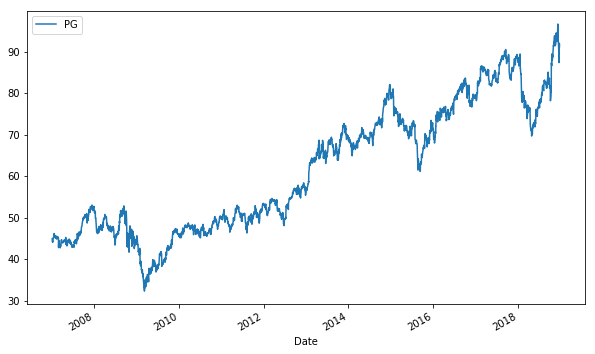

In [4]:
data.plot(figsize=(10, 6));

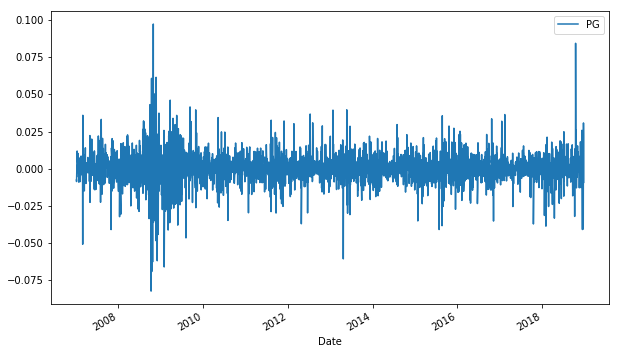

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000235
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000121
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000174
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011
dtype: float64

In [10]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.73523225,  0.05794154],
       [ 0.77773738, -0.49891039],
       [ 0.99674851,  0.63210524],
       [ 0.85134001, -0.04583497],
       [ 0.48483778, -0.50414726],
       [-0.02973664, -0.41699867],
       [ 1.12795941,  0.56307032],
       [-1.95745996, -1.28319822],
       [ 0.81382914,  0.89527494],
       [-0.75556158,  1.81435813]])

In [11]:
t_intervals = 1000
iterations = 10

In [12]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [13]:
daily_returns

array([[1.00315807, 0.99931227, 0.99108357, ..., 0.99181662, 1.00807189,
        0.99854658],
       [1.00020883, 1.0044486 , 1.02335871, ..., 0.97596345, 0.98703197,
        1.0049027 ],
       [1.01283553, 0.99719413, 1.00118198, ..., 0.99455208, 0.99981394,
        1.02344947],
       ...,
       [0.99287757, 0.99140033, 0.99750445, ..., 0.993442  , 0.98276589,
        1.01051944],
       [0.98533944, 1.01137601, 0.99866331, ..., 1.01542105, 1.00744608,
        1.00073271],
       [1.00238349, 0.99722039, 0.99481031, ..., 1.00016651, 1.00739112,
        1.0118957 ]])

In [14]:
S0 = data.iloc[-1]
S0

PG    91.18
Name: 2018-12-28 00:00:00, dtype: float64

In [15]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
price_list[0] = S0
price_list

array([[91.18000031, 91.18000031, 91.18000031, ..., 91.18000031,
        91.18000031, 91.18000031],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [18]:
price_list

array([[ 91.18000031,  91.18000031,  91.18000031, ...,  91.18000031,
         91.18000031,  91.18000031],
       [ 91.19904174,  91.58562337,  93.30984785, ...,  88.98834807,
         89.99757518,  91.62702874],
       [ 92.36962977,  91.32864646,  93.42013799, ...,  88.50354685,
         89.98083052,  93.77563427],
       ...,
       [124.49239633,  43.60181092, 162.17699949, ...,  78.29900351,
        131.34566597, 118.22581321],
       [122.66726755,  44.09782562, 161.96021959, ...,  79.50645638,
        132.32367668, 118.31243793],
       [122.9596442 ,  43.97525093, 161.1196955 , ...,  79.51969531,
        133.30169721, 119.71984729]])

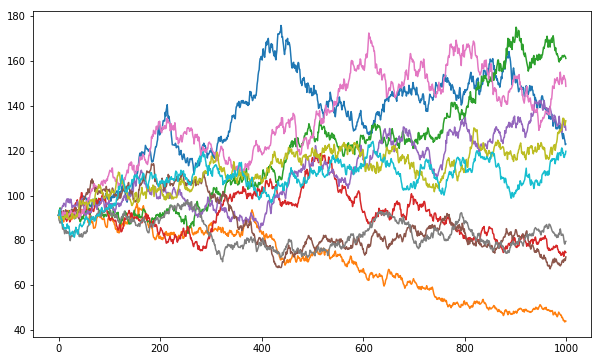

In [19]:
plt.figure(figsize=(10,6))
plt.plot(price_list);